Handling LTL and PSL formulas
=============================

In [1]:
import spot

For interactive use, formulas can be entered as text strings and passed to the `spot.formula` constructor.

In [2]:
f = spot.formula('p1 U p2 R (p3 & !p4)')
f

p1 U (p2 R (p3 & !p4))

In [3]:
g = spot.formula('{a;b*;c[+]}<>->GFb'); g

{a;b[*];c[+]}<>-> GFb

By default the parser recognizes an infix syntax, but when this fails, it tries to read the formula with the [LBT](http://www.tcs.hut.fi/Software/maria/tools/lbt/) syntax:

In [4]:
h = spot.formula('& | a b c'); h

c & (a | b)

Passing a `formula` to `spot.formula` simply returns the formula.

In [5]:
spot.formula(h)

c & (a | b)

By default, a formula object is presented using mathjax as above.
When a formula is converted to string you get Spot's syntax by default:

In [6]:
str(f)

'p1 U (p2 R (p3 & !p4))'

If you prefer to print the string in another syntax, you may use the `to_str()` method, with an argument that indicates the output format to use.  The `latex` format assumes that you will the define macros such as `\U`, `\R` to render all operators as you wish.  On the otherhand, the `sclatex` (with `sc` for self-contained) format hard-codes the rendering of each of those operators: this is almost the same output that is used to render formulas using MathJax in a notebook. `sclatex` and `mathjax` only differ in the rendering of double-quoted atomic propositions.

In [7]:
for i in ['spot', 'spin', 'lbt', 'wring', 'utf8', 'latex', 'sclatex', 'mathjax']:
    print("%-10s%s" % (i, f.to_str(i)))

spot      p1 U (p2 R (p3 & !p4))
spin      p1 U (p2 V (p3 && !p4))
lbt       U p1 V p2 & p3 ! p4
wring     (p1=1) U ((p2=1) R ((p3=1) * (p4=0)))
utf8      p1 U (p2 R (p3∧¬p4))
latex     p_{1} \U (p_{2} \R (p_{3} \land \lnot p_{4}))
sclatex   p_{1} \mathbin{\mathsf{U}} (p_{2} \mathbin{\mathsf{R}} (p_{3} \land \lnot p_{4}))
mathjax   p_{1} \mathbin{\mathsf{U}} (p_{2} \mathbin{\mathsf{R}} (p_{3} \land \lnot p_{4}))


Formulas output via `format()` can also use some convenient shorthand to select the syntax:

In [8]:
print("""\
Spin:               {0:s}
Spin+parentheses:   {0:sp}
Spot (default):     {0}
Spot+shell quotes:  {0:q}
LBT, right aligned: {0:l:~>40}
LBT, no M/W/R:      {0:[MWR]l}""".format(f))

Spin:               p1 U (p2 V (p3 && !p4))
Spin+parentheses:   (p1) U ((p2) V ((p3) && (!(p4))))
Spot (default):     p1 U (p2 R (p3 & !p4))
Spot+shell quotes:  'p1 U (p2 R (p3 & !p4))'
LBT, right aligned: ~~~~~~~~~~~~~~~~~~~~~U p1 V p2 & p3 ! p4
LBT, no M/W/R:      U p1 U & p3 ! p4 | & & p2 p3 ! p4 G & p3 ! p4


The specifiers that can be used with `format` are documented as follows:

In [9]:
help(spot.formula.__format__)

Help on function __format__ in module spot:

__format__(self, spec)
    Format the formula according to `spec`.
    
    Parameters
    ----------
    spec : str, optional
        a list of letters that specify how the formula
        should be formatted.
    
    Supported specifiers
    --------------------
    
    - 'f': use Spot's syntax (default)
    - '8': use Spot's syntax in UTF-8 mode
    - 's': use Spin's syntax
    - 'l': use LBT's syntax
    - 'w': use Wring's syntax
    - 'x': use LaTeX output
    - 'X': use self-contained LaTeX output
    - 'j': use self-contained LaTeX output, adjusted for MathJax
    
    Add some of those letters for additional options:
    
    - 'p': use full parentheses
    - 'c': escape the formula for CSV output (this will
           enclose the formula in double quotes, and escape
           any included double quotes)
    - 'h': escape the formula for HTML output
    - 'd': escape double quotes and backslash,
           for use in C-strings (th

A `spot.formula` object has a number of built-in predicates whose value have been computed when the formula was constructed.  For instance you can check whether a formula is in negative normal form using `is_in_nenoform()`, and you can make sure it is an LTL formula (i.e. not a PSL formula) using `is_ltl_formula()`:

In [10]:
f.is_in_nenoform() and f.is_ltl_formula()

True

In [11]:
g.is_ltl_formula()

False

Similarly, `is_syntactic_stutter_invariant()` tells wether the structure of the formula guarranties it to be stutter invariant.  For LTL formula, this means the `X` operator should not be used.  For PSL formula, this function capture all formulas built using the [siPSL grammar](http://www.daxc.de/eth/paper/09atva.pdf).

In [12]:
f.is_syntactic_stutter_invariant()

True

In [13]:
spot.formula('{a[*];b}<>->c').is_syntactic_stutter_invariant()

False

In [14]:
spot.formula('{a[+];b[*]}<>->d').is_syntactic_stutter_invariant()

True

`spot.relabel` renames the atomic propositions that occur in a formula, using either letters, or numbered propositions:

In [15]:
gf = spot.formula('(GF_foo_) && "a > b" && "proc[2]@init"'); gf

"a > b" & "proc[2]@init" & GF_foo_

In [16]:
spot.relabel(gf, spot.Abc)

a & b & GFc

In [17]:
spot.relabel(gf, spot.Pnn)

p0 & p1 & GFp2

The AST of any formula can be displayed with `show_ast()`.  Despite the name, this is not a tree but a DAG, because identical subtrees are merged.  Binary operators have their left and right operands denoted with `L` and `R`, while non-commutative n-ary operators have their operands numbered.

{a;b[*];c[+]}<>-> GFb


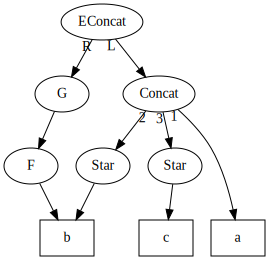

In [18]:
print(g); g.show_ast()

Any formula can also be classified in the temporal hierarchy of Manna & Pnueli

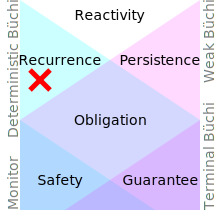

In [19]:
g.show_mp_hierarchy()

In [20]:
spot.mp_class(g, 'v')

'recurrence'

In [21]:
f = spot.formula('F(a & X(!a & b))'); f

F(a & X(!a & b))

Etessami's rule for removing X (valid only in stutter-invariant formulas)

In [22]:
spot.remove_x(f)

F(a & ((a & (a U (!a & b)) & ((!b U !a) | (b U !a))) | (!a & (!a U (a & !a & b)) & ((!b U a) | (b U a))) | (b & (b U (!a & b & !b)) & ((!a U !b) | (a U !b))) | (!b & (!b U (!a & b)) & ((!a U b) | (a U b))) | (!a & b & (G!a | Ga) & (G!b | Gb))))

Removing abbreviated operators

In [23]:
f = spot.formula("G(a xor b) -> F(a <-> b)")
spot.unabbreviate(f, "GF^")

(0 R !(a <-> b)) -> (1 U (a <-> b))

In [24]:
spot.unabbreviate(f, "GF^ei")

(1 U ((a & b) | (!a & !b))) | !(0 R ((!a & b) | (a & !b)))

Nesting level of operators

In [25]:
f = spot.formula('F(b & X(a U b U ((a W Fb) | (c U d))))')
print("U", spot.nesting_depth(f, spot.op_U))
print("F", spot.nesting_depth(f, spot.op_F))
# These following two are syntactic sugar for the above two
print("U", spot.nesting_depth(f, "U"))
print("F", spot.nesting_depth(f, "F"))
# If you want to consider "U" and "F" are a similar type of
# operator, you can count both with
print("FU", spot.nesting_depth(f, "FU"))

U 3
F 2
U 3
F 2
FU 4
